# Obtaining Estimation and Simulation Results

In [1]:
import os
from matplotlib import pyplot as plt
from tools import models

We now create a base instance of the model (constant discount rates). This is useful for starting other specifications. This is not our reference scenario in the paper. 

In [2]:
sp = models.sp
base = sp('ref')
base.chgoption('iload','T')

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  iload  with value F  to  T  ...


We estimate parameters and simulate data post estimation

In [3]:
base.estimate()
base.loglike

/Users/loulou/joint/runtime/tools/models.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])


-2626.181672856694

We will now create a model that estimates discount rates. This is the baseline specification for the revision. 

In [4]:
disc = sp('discount')
disc.chgoption('idiscount','T')
disc.chgoption('iload','T')
disc.estimate()
disc.loglike

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  idiscount  with value F  to  T  ...
changed item  iload  with value F  to  T  ...


/Users/loulou/joint/runtime/tools/models.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])


-2594.043118550905

Very important note: This allows for heterogeneity in the complementarity effect and correlation across spouses. 

## Robustness of Specification

We will collect a few loglikelihoods to do LR tests (Table in main text). We will also present some results in the appendix for these alternative models.  

### Model with uncorrelated types

Very important: This specification kills the correlation in marginal utility of leisure BUT not in the complementarity effect. 

In [5]:
uncor = sp('nocorr')
uncor.chgoption('icorr','F')
uncor.chgoption('idiscount','T')
uncor.chgoption('iload','T')
uncor.estimate()
uncor.loglike

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  icorr  with value T  to  F  ...
changed item  idiscount  with value F  to  T  ...
changed item  iload  with value F  to  T  ...


/Users/loulou/joint/runtime/tools/models.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])


-2594.047247653388

### Model without Survival Risk

We do not show this specification in the paper, but it is there....

In [6]:
nosurv = sp('nosurv')
nosurv.chgoption('isurvival','F')
nosurv.chgoption('idiscount','T')
nosurv.chgoption('iload','T')
nosurv.estimate()
nosurv.loglike

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  isurvival  with value T  to  F  ...
changed item  idiscount  with value F  to  T  ...
changed item  iload  with value F  to  T  ...


/Users/loulou/joint/runtime/tools/models.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])


-2587.713880681494

### Model without Complementarity

This is the specification without complementarity effect. Hence, it restricts both the mean effect to be zero but also the heterogeneity in the complementarity effect. 

In [7]:
nocomp = sp('nocomp')
nocomp.chgoption('idiscount','T')
nocomp.chgoption('icomplement','F')
nocomp.chgoption('ijointhetero','F')
nocomp.chgoption('iload','F')
nocomp.estimate()
nocomp.loglike

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  idiscount  with value F  to  T  ...
changed item  icomplement  with value T  to  F  ...
changed item  ijointhetero  with value T  to  F  ...
value already set to  F


/Users/loulou/joint/runtime/tools/models.py:155: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])
/Users/loulou/joint/runtime/tools/models.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])


-2849.321166900954

### Unitary Model

In [8]:
unitary = sp('unitary')
unitary.chgoption('iunitary','T')
unitary.chgoption('idiscount','T')
unitary.chgoption('iload','T')
unitary.estimate()
unitary.loglike

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  iunitary  with value F  to  T  ...
changed item  idiscount  with value F  to  T  ...
changed item  iload  with value F  to  T  ...


/Users/loulou/joint/runtime/tools/models.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])


-2596.5757467725543

This is the specification with heterogeneity in discount rates. We do not show it below. 

In [9]:
hdisc = sp('hdiscount')
hdisc.chgoption('idiscount','T')
hdisc.chgoption('idischetero','T')
hdisc.chgoption('iload','T')
hdisc.estimate()
print(hdisc.loglike)
hdisc.params

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  idiscount  with value F  to  T  ...
changed item  idischetero  with value F  to  T  ...
changed item  iload  with value F  to  T  ...
-2482.025322323011


,par,se
alpha_c,3.7033472024245194E-002,1.7546656331714212E-002
alpha_lm_cons,-2.2601473741661451,0.51547286728631581
alpha_lm_age,0.61759661930699639,0.10328785974972771
alpha_lm_hlim,1.7526107435631357,0.54499726261589565
alpha_lm_college,-6.0641315995189911E-002,0.23339240688929530
alpha_lm_male,0.15057566321894247,0.31157543646987290
alpha_lm_job,-0.37211513217848757,0.32051238896011691
alpha_lf,0.0000000000000000,0.0000000000000000
alpha_lm_lf,0.27013434128914710,5.3431470836475710E-002
beta_c,6.3355934821976809E-002,3.0866180583610691E-002


### Table with LR Tests

In [10]:
import pandas as pd
data = [disc.loglike,base.loglike,uncor.loglike,nocomp.loglike,unitary.loglike]
lr = [0]
for i in range(1,len(data)):
    lr.append(-2.0*(data[i]-data[0]))
names = ['Baseline','Fixed Discount Rates (2)','No Correlation UH (1)','No Complementarity (5)','Unitary (1)']
table = pd.DataFrame(data=list(zip(data,lr)),index=names,columns=['Loglikehood Value','LR Statistic'])
def f(x):
    return '{:1.3f}'.format(x)
with open('../tex/tables/lrtests.tex','w') as tf:
    tf.write(table.to_latex(formatters=[f,f]))
table    

,Loglikehood Value,LR Statistic
Baseline,-2594.043119,0.000000
Fixed Discount Rates (2),-2626.181673,64.277109
No Correlation UH (1),-2594.047248,0.008258
No Complementarity (5),-2849.321167,510.556097
Unitary (1),-2596.575747,5.065256


Critical values at 5% for these tests:

In [11]:
from scipy.stats import chi2
[chi2(1).ppf(0.95),chi2(2).ppf(0.95),chi2(5).ppf(0.95)]

[3.8414588206941236, 5.99146454710798, 11.070497693516351]

## Correlation with Expected Retirement in HRS

In [12]:
disc.sim['rexpret'] = disc.sim['rage_mod'] + (disc.sim['rexpret']-2011)
disc.sim['sexpret'] = disc.sim['sage_mod'] + (disc.sim['sexpret']-2011)


In [13]:

disc.sim[['rexpret','sexpret']].describe()
  

,rexpret,sexpret
count,200.000000,257.000000
mean,64.870000,64.459144
std,4.203743,4.221328
min,54.000000,54.000000
25%,62.000000,62.000000
50%,65.000000,64.000000
75%,68.000000,66.000000
max,84.000000,80.000000


Correlations with simulated expected retirement age

In [14]:

print('Males   : ',disc.sim[['rexpret','rexpret_sim']].corr())
print('Females : ',disc.sim[['sexpret','sexpret_sim']].corr())
    

Males   :                rexpret  rexpret_sim
rexpret      1.000000     0.198724
rexpret_sim  0.198724     1.000000
Females :                sexpret  sexpret_sim
sexpret      1.000000     0.273366
sexpret_sim  0.273366     1.000000


We will do a figure to check correlation

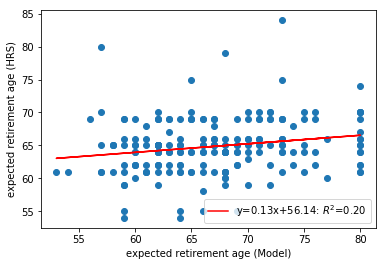

In [15]:
from scipy.stats import linregress
data = disc.sim[['rexpret_sim','rexpret']].dropna()
x = data['rexpret_sim']
y = data['rexpret']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
line = slope*x+intercept
plt.figure()
plt.scatter(x,y,label='')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}: $R^2$={:.2f}'.format(slope,intercept,r_value))
plt.xlabel('expected retirement age (Model)')
plt.ylabel('expected retirement age (HRS)')
plt.legend(loc=4)
plt.savefig('../tex/figures/match_males.eps')
plt.show()

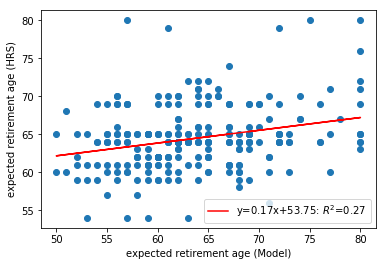

In [16]:
from scipy.stats import linregress
data = disc.sim[['sexpret_sim','sexpret']].dropna()
x = data['sexpret_sim']
y = data['sexpret']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
line = slope*x+intercept
plt.figure()
plt.scatter(x,y,label='')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}: $R^2$={:.2f}'.format(slope,intercept,r_value))
plt.xlabel('expected retirement age (Model)')
plt.ylabel('expected retirement age (HRS)')
plt.legend(loc=4)
plt.savefig('../tex/figures/match_females.eps')
plt.show()

## Distribution of Retirement Ages

       rexpret_sim  sexpret_sim
count   464.000000   464.000000
mean     66.743534    63.657328
std       6.687805     6.814499
min      51.000000    50.000000
25%      62.000000    59.000000
50%      66.000000    62.000000
75%      72.000000    68.000000
max      80.000000    80.000000
correlation :               rexpret_sim  sexpret_sim
rexpret_sim     1.000000     0.702591
sexpret_sim     0.702591     1.000000


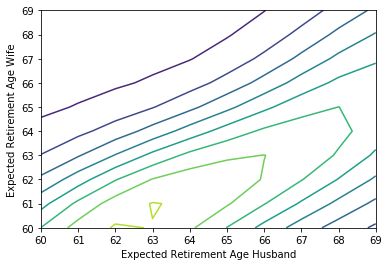

In [17]:
%matplotlib inline
from scipy.stats import gaussian_kde
from numba import jit
import numpy as np
x = disc.sim['rexpret_sim'].tolist()
y = disc.sim['sexpret_sim'].tolist()
print(disc.sim[['rexpret_sim','sexpret_sim']].describe())
print('correlation : ', disc.sim[['rexpret_sim','sexpret_sim']].corr())
X, Y = np.mgrid[60:69:10j, 60:69:10j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
plt.figure()
plt.contour(X,Y,Z)
plt.xlabel('Expected Retirement Age Husband')
plt.ylabel('Expected Retirement Age Wife')
plt.savefig('../tex/figures/retages.eps')

       distance_m  distance_f
count  464.000000  464.000000
mean    10.107759    7.995690
std      7.245556    7.211401
min      0.000000    0.000000
25%      4.000000    1.000000
50%     10.000000    7.000000
75%     15.000000   13.000000
max     29.000000   31.000000
correlation:              distance_m  distance_f
distance_m    1.000000    0.721982
distance_f    0.721982    1.000000


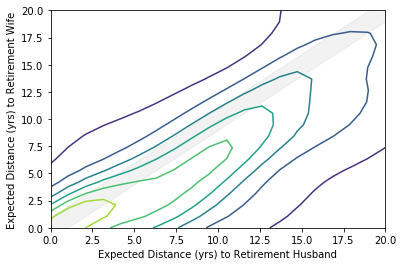

In [18]:
disc.sim['distance_m'] = disc.sim['rexpret_sim'] - disc.sim['rage_mod']
disc.sim['distance_f'] = disc.sim['sexpret_sim'] - disc.sim['sage_mod']
print(disc.sim[['distance_m','distance_f']].describe())
print('correlation: ', disc.sim[['distance_m','distance_f']].corr())

%matplotlib inline
from scipy.stats import gaussian_kde
from numba import jit
import numpy as np
x = disc.sim['distance_m'].tolist()
y = disc.sim['distance_f'].tolist()

X, Y = np.mgrid[0:20:20j, 0:20:20j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
plt.figure()
plt.contour(X,Y,Z)
xx = np.linspace(0,20,20)
plt.fill_between(xx, xx-1, xx+1, color='grey', alpha='0.1')
plt.xlim([0,20])
plt.ylim([0,20])
plt.xlabel('Expected Distance (yrs) to Retirement Husband')
plt.ylabel('Expected Distance (yrs) to Retirement Wife')
plt.savefig('../tex/figures/distances.eps',dpi=600)

## Joint Retirement

We will now re-rerun the discount model (baseline) with three scenarios: reshuffling heterogeneity, reshuffling wages and shutting down complementarity. 

In [19]:
wages = sp('discount')
wages.chgoption('iload','T')
wages.chgoption('idiscount','T')
wages.chgoption('ishufwages','T')
wages.estimate()

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  iload  with value F  to  T  ...
changed item  idiscount  with value F  to  T  ...
changed item  ishufwages  with value F  to  T  ...


/Users/loulou/joint/runtime/tools/models.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])


In [20]:
heter = sp('discount')
heter.chgoption('iload','T')
heter.chgoption('idiscount','T')
heter.chgoption('ishufheter','T')
heter.estimate()

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  iload  with value F  to  T  ...
changed item  idiscount  with value F  to  T  ...
changed item  ishufheter  with value F  to  T  ...


/Users/loulou/joint/runtime/tools/models.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])


In [21]:
comp = sp('discount')
comp.chgoption('iload','T')
comp.chgoption('idiscount','T')
comp.chgoption('iblockcomp','T')
comp.estimate()

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  iload  with value F  to  T  ...
changed item  idiscount  with value F  to  T  ...
changed item  iblockcomp  with value F  to  T  ...


/Users/loulou/joint/runtime/tools/models.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])


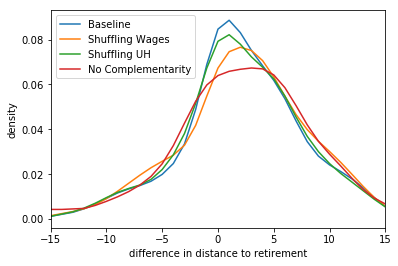

,Ret Age Males,Ret Age Females,Fraction Joint
Baseline,66.743534,63.657328,0.286638
Shuffling Wages,66.672414,63.489224,0.224138
Shuffling UH,66.709052,63.674569,0.256466
No Complementarity,67.200431,64.060345,0.204741


In [22]:
specs = [disc,wages,heter,comp]
names =  ['Baseline','Shuffling Wages','Shuffling UH','No Complementarity']
data = []
plt.figure()
for i,s in enumerate(specs):
    s.sim['distance_m'] = s.sim['rexpret_sim'] - s.sim['rage_mod']
    s.sim['distance_f'] = s.sim['sexpret_sim'] - s.sim['sage_mod']
    s.sim['joint'] = np.abs(s.sim['distance_m'] - s.sim['distance_f'])<=1.0
    s.sim['joint_yrs'] = s.sim['distance_m'] - s.sim['distance_f']
    x = s.sim['joint_yrs'].values
    x.sort()
    ff = gaussian_kde(x)
    plt.plot(x,ff(x),label=names[i])
    data.append([s.sim['rexpret_sim'].mean(),s.sim['sexpret_sim'].mean(),s.sim['joint'].mean()])
table = pd.DataFrame(data=data,index=names,columns=['Ret Age Males','Ret Age Females','Fraction Joint'])  
def f(x):
    return '{:1.3f}'.format(x)
with open('../tex/tables/joint.tex','w') as tf:
    tf.write(table.to_latex(formatters=[f,f,f]))
plt.legend(loc=2)
plt.xlabel('difference in distance to retirement')
plt.ylabel('density')
plt.xlim([-15,15])
plt.savefig('../tex/figures/compare_distances.eps')
plt.show()
table

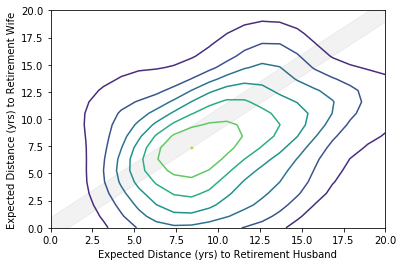

In [23]:
%matplotlib inline
from scipy.stats import gaussian_kde
from numba import jit
import numpy as np
x = comp.sim['distance_m'].tolist()
y = comp.sim['distance_f'].tolist()

X, Y = np.mgrid[0:20:20j, 0:20:20j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
plt.figure()
plt.contour(X,Y,Z)
xx = np.linspace(0,20,20)
plt.fill_between(xx, xx-1, xx+1, color='grey', alpha='0.1')
plt.xlim([0,20])
plt.ylim([0,20])
plt.xlabel('Expected Distance (yrs) to Retirement Husband')
plt.ylabel('Expected Distance (yrs) to Retirement Wife')
plt.savefig('../tex/figures/distances_nocomp.eps',dpi=600)

In [24]:
disc.sim['agediff'] = disc.sim['rage_mod']- disc.sim['sage_mod']
print(comp.sim[['distance_m','distance_f']].describe())
print(disc.sim[['distance_m','distance_f']].describe())



       distance_m  distance_f
count  464.000000  464.000000
mean    10.564655    8.398707
std      4.507747    4.799037
min      0.000000    0.000000
25%      7.000000    5.000000
50%     10.000000    8.000000
75%     13.000000   11.000000
max     28.000000   23.000000
       distance_m  distance_f
count  464.000000  464.000000
mean    10.107759    7.995690
std      7.245556    7.211401
min      0.000000    0.000000
25%      4.000000    1.000000
50%     10.000000    7.000000
75%     15.000000   13.000000
max     29.000000   31.000000


# Policy Simulation

Finally, we have to check what happens when we do policy simulations. We will do policy simulations over two parameters, the ARF (actuarial reduction factor) and the generosity of the pension (replacement rate). 

In [25]:
arf = [0,0.09]
drc = [0,0.11]
rep = [0.4,0.8]
factors = zip(arf,drc)
experiments = [disc]
for a,d in factors:
    this = sp('discount')
    this.chgoption('iload','T')
    this.chgoption('idiscount','T')
    this.chgoption('arf',a)
    this.chgoption('drc',d)
    this.estimate()
    this.sim['distance_m'] = this.sim['rexpret_sim'] - this.sim['rage_mod']
    this.sim['distance_f'] = this.sim['sexpret_sim'] - this.sim['sage_mod']
    this.sim['joint'] = np.abs(this.sim['distance_m'] - this.sim['distance_f'])<=1.0    
    experiments.append(this)
for r in rep:
    this = sp('discount')
    this.chgoption('iload','T')
    this.chgoption('idiscount','T')
    this.chgoption('reprate',r)
    this.estimate()
    this.sim['distance_m'] = this.sim['rexpret_sim'] - this.sim['rage_mod']
    this.sim['distance_f'] = this.sim['sexpret_sim'] - this.sim['sage_mod']
    this.sim['joint'] = np.abs(this.sim['distance_m'] - this.sim['distance_f'])<=1.0    
    experiments.append(this)
    

Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  iload  with value F  to  T  ...
changed item  idiscount  with value F  to  T  ...
changed item  arf  with value 0.06  to  0  ...
changed item  drc  with value 0.08  to  0  ...


/Users/loulou/joint/runtime/tools/models.py:175: RuntimeWarning: invalid value encountered in double_scalars
  cov[1,0] = cov[1,0]/np.sqrt(cov[0,0]*cov[1,1])


Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.08
reprate  =  0.6
ishufheter  =  F
ishufwages  =  F
iblockcomp  =  F
ifixcorr  =  F
dfixrho  =  0.5
ifixdisccorr  =  F
dfixdiscrho  =  0.5
inoestim  =  F
changed item  iload  with value F  to  T  ...
changed item  idiscount  with value F  to  T  ...
changed item  arf  with value 0.06  to  0.09  ...
changed item  drc  with value 0.08  to  0.11  ...
Default options: 
isurvival  =  T
iload  =  F
iestimate  =  T
data  =  hrs_final_ref.csv
info  =  info_ref.dat
includeratings  =  F
icomplement  =  T
ihetero  =  T
ijointhetero  =  T
ibargaininghetero  =  F
idischetero  =  F
icorr  =  T
iunitary  =  F
idiscount  =  F
ddiscount  =  0.95
idirect  =  F
arf  =  0.06
drc  =  0.0

In [26]:
data = [[e.sim['rexpret_sim'].mean(),e.sim['sexpret_sim'].mean(),e.sim['joint'].mean()] for e in experiments]
names = ['Baseline','No Penalty','High Penalty','Low Generosity','High Generosity']
table = pd.DataFrame(data=data,columns=['Ret Age Males','Ret Age Females','Fraction Retiring Jointly'],index=names)
print(table)
def f(x):
    return '{:1.3f}'.format(x)
with open('../tex/tables/policy.tex','w') as tf:
    tf.write(table.to_latex(formatters=[f,f,f]))

                 Ret Age Males  Ret Age Females  Fraction Retiring Jointly
Baseline             66.743534        63.657328                   0.286638
No Penalty           64.323276        61.834052                   0.323276
High Penalty         67.696121        64.334052                   0.228448
Low Generosity       67.286638        64.002155                   0.221983
High Generosity      66.314655        63.424569                   0.306034
